<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/ml-lab/blob/main/ML_TEAM13_ENDSEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving high_popularity_spotify_data.csv to high_popularity_spotify_data.csv
Original dataset shape: (1686, 29)
Preview:
   energy    tempo  danceability playlist_genre  loudness  liveness  valence  \
0   0.592  157.969         0.521            pop    -7.777     0.122    0.535   
1   0.507  104.978         0.747            pop   -10.171     0.117    0.438   
2   0.808  108.548         0.554            pop    -4.169     0.159    0.372   
3   0.910  112.966         0.670            pop    -4.070     0.304    0.786   
4   0.783  149.027         0.777            pop    -4.477     0.355    0.939   

            track_artist  time_signature  speechiness  ...  instrumentalness  \
0  Lady Gaga, Bruno Mars               3       0.0304  ...            0.0000   
1          Billie Eilish               4       0.0358  ...            0.0608   
2          Gracie Abrams               4       0.0368  ...            0.0000   
3      Sabrina Carpenter               4       0.0634  ...            0.0000   

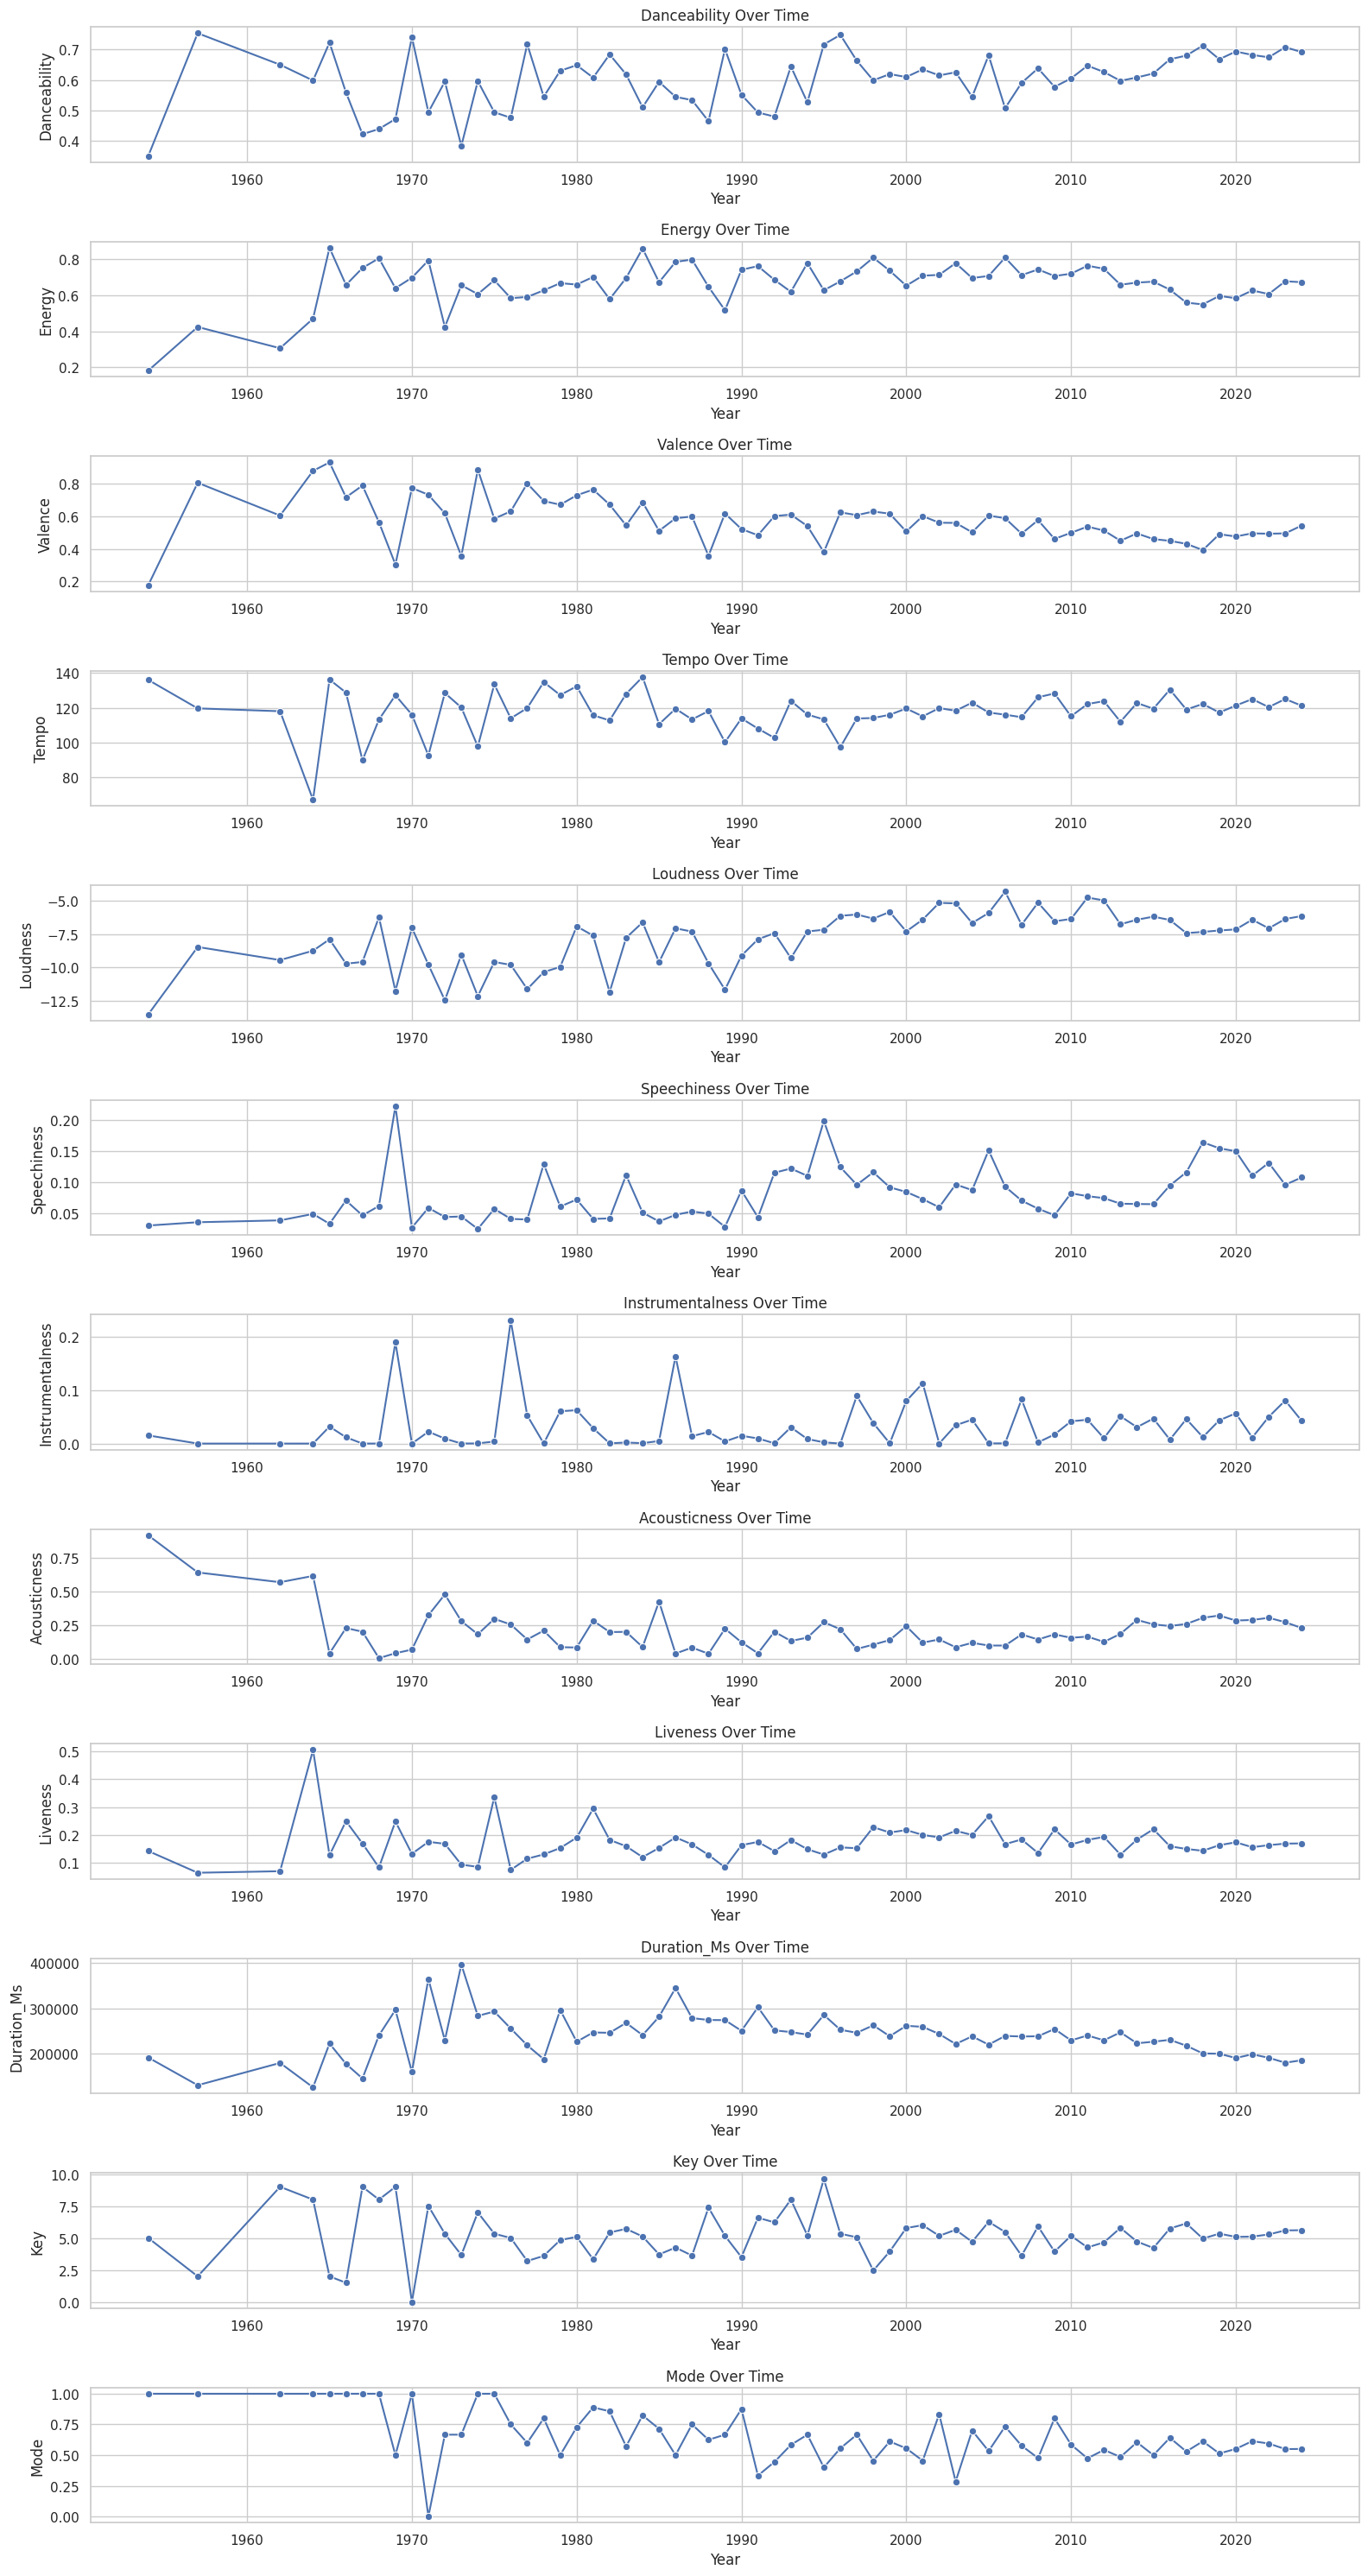

In [ ]:
# STEP 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# STEP 3: Load and preview the dataset
df = pd.read_csv('high_popularity_spotify_data.csv')
print("Original dataset shape:", df.shape)
print("Preview:")
print(df.head())

# STEP 4: Parse release year and clean data
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['release_year'] = df['track_album_release_date'].dt.year
df = df[df['release_year'].between(1950, 2025)]

audio_features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'key', 'mode'
]

df_cleaned = df.dropna(subset=audio_features + ['release_year'])
print("Cleaned dataset shape:", df_cleaned.shape)

# STEP 5: Group by year and compute mean feature values
yearly_trends = df_cleaned.groupby('release_year')[audio_features].mean().reset_index()

# STEP 6: Plot temporal trends
plt.figure(figsize=(16, 30))
for i, feature in enumerate(audio_features):
    plt.subplot(len(audio_features), 1, i + 1)
    sns.lineplot(data=yearly_trends, x='release_year', y=feature, marker='o')
    plt.title(f'{feature.title()} Over Time')
    plt.xlabel('Year')
    plt.ylabel(feature.title())
    plt.tight_layout()
plt.show()


Saving high_popularity_spotify_data.csv to high_popularity_spotify_data (1).csv
Saving low_popularity_spotify_data.csv to low_popularity_spotify_data.csv


<Figure size 1200x600 with 0 Axes>

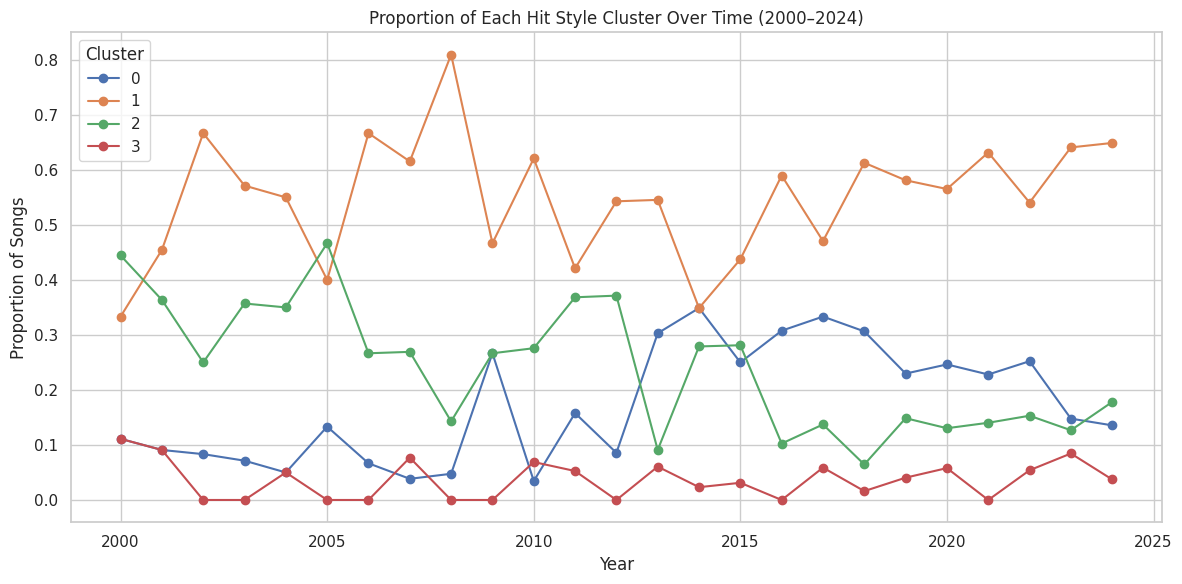


 Suggested Improvements for Your Song (to match 2023 hit trends):

- danceability: increase by approx 0.158
- energy: increase by approx 0.077
- valence: increase by approx 0.046
- tempo: increase by approx 15.109
- loudness: decrease by approx 0.369
- speechiness: increase by approx 0.056
- instrumentalness: decrease by approx 0.02
- acousticness: increase by approx 0.071
- liveness: increase by approx 0.07


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

df = pd.read_csv('high_popularity_spotify_data.csv')
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['release_year'] = df['track_album_release_date'].dt.year
df = df[df['release_year'].between(1950, 2025)]

audio_features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'key', 'mode'
]

df_cleaned = df.dropna(subset=audio_features + ['release_year'])
df_cluster = df_cleaned[df_cleaned['release_year'] >= 2000].copy()

features_for_clustering = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features_for_clustering])

kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

cluster_trend = df_cluster.groupby(['release_year', 'cluster']).size().unstack(fill_value=0)
cluster_trend_percent = cluster_trend.div(cluster_trend.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
cluster_trend_percent.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Proportion of Each Hit Style Cluster Over Time (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Proportion of Songs')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Hit Recommender
target_year = 2023
recent_hit_profile = df_cleaned[df_cleaned['release_year'] == target_year][features_for_clustering].mean()

user_song = {
    'danceability': 0.55,
    'energy': 0.60,
    'valence': 0.45,
    'tempo': 110,
    'loudness': -6.0,
    'speechiness': 0.04,
    'instrumentalness': 0.1,
    'acousticness': 0.2,
    'liveness': 0.1,
    'duration_ms': 180000
}

user_df = pd.DataFrame([user_song])
diff = recent_hit_profile - user_df.iloc[0]
recommendations = {}

for feature in features_for_clustering:
    if abs(diff[feature]) > 0.05 * recent_hit_profile[feature]:
        direction = "increase" if diff[feature] > 0 else "decrease"
        recommendations[feature] = f"{direction} by approx {round(abs(diff[feature]), 3)}"

if recommendations:
    print("\n Suggested Improvements for Your Song (to match 2023 hit trends):\n")
    for feat, suggestion in recommendations.items():
        print(f"- {feat}: {suggestion}")
else:
    print(" Your song is already closely aligned with 2023 hit trends!")


In [ ]:
# STEP 1: Upload and import
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import os

# STEP 2: Load and clean datasets
high_df = pd.read_csv("high_popularity_spotify_data.csv")
low_df = pd.read_csv("low_popularity_spotify_data.csv")

high_df['track_album_release_date'] = pd.to_datetime(high_df['track_album_release_date'], errors='coerce')
low_df['track_album_release_date'] = pd.to_datetime(low_df['track_album_release_date'], errors='coerce')

high_df['release_year'] = high_df['track_album_release_date'].dt.year
low_df['release_year'] = low_df['track_album_release_date'].dt.year

recent_high = high_df[high_df['release_year'].between(2015, 2023)].copy()
recent_low = low_df[low_df['release_year'].between(2015, 2023)].copy()

features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms'
]

recent_high = recent_high.dropna(subset=features)
recent_low = recent_low.dropna(subset=features)

#  SAVE 2023 TEMPORAL TREND PROFILE
profile_2023 = high_df[high_df['release_year'] == 2023][features].mean()
profile_2023.to_csv('/content/trend_profile_2023.csv')
print("Saved 2023 trend profile to trend_profile_2023.csv")

# Prepare data
scaler = StandardScaler()
X_real = scaler.fit_transform(recent_high[features])
X_fake_neg = scaler.transform(recent_low[features])

real_data = torch.tensor(X_real, dtype=torch.float32)
fake_neg_data = torch.tensor(X_fake_neg, dtype=torch.float32)

# STEP 3: GAN Setup
latent_dim = 64
feature_dim = real_data.shape[1]
epochs = 300
batch_size = 64

class TunedGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, feature_dim)
        )

    def forward(self, z):
        return self.net(z)

class TunedDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

G = TunedGenerator()
D = TunedDiscriminator()
loss_fn = nn.BCELoss()
G_opt = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_opt = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
real_loader = DataLoader(TensorDataset(real_data), batch_size=batch_size, shuffle=True)

# Load the trend profile for 2023 (used for temporal drift comparison)
trend_profile_2023 = pd.read_csv('/content/trend_profile_2023.csv', index_col=0)
# Ensure trend_tensor_2023 is a tensor with shape (1, feature_dim)
trend_tensor_2023 = torch.tensor(profile_2023.values, dtype=torch.float32).unsqueeze(0)

# STEP 4: Training loop
# STEP 4: Training loop
# STEP 4: Training loop
for epoch in range(epochs):
    for real_batch, in real_loader:
        batch_size = real_batch.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Generator forward pass
        z = torch.randn(batch_size, latent_dim)
        fake_batch = G(z)

        # Ensure trend_tensor_2023 matches the batch size by repeating it
        trend_tensor_2023_expanded = trend_tensor_2023.repeat(batch_size, 1)

        # Temporal Drift Penalty: Compare fake_batch with trend_tensor_2023_expanded
        temporal_drift_penalty = torch.mean(torch.abs(fake_batch - trend_tensor_2023_expanded))

        # Discriminator loss (with Temporal Drift Penalty)
        D_real = D(real_batch)
        D_fake = D(fake_batch.detach())
        D_loss = loss_fn(D_real, real_labels) + loss_fn(D_fake, fake_labels) + temporal_drift_penalty

        if len(fake_neg_data) >= batch_size:
            neg_samples = fake_neg_data[np.random.choice(len(fake_neg_data), batch_size)]
            D_neg = D(neg_samples)
            D_loss += loss_fn(D_neg, fake_labels)

        # Backprop for Discriminator (retain graph for Generator)
        D_opt.zero_grad()
        D_loss.backward(retain_graph=True)  # Retain graph to allow further backward passes
        D_opt.step()

        # Generator loss (with Temporal Drift Penalty)
        z = torch.randn(batch_size, latent_dim)
        fake_batch = G(z)
        D_fake = D(fake_batch)
        G_loss = loss_fn(D_fake, real_labels) + temporal_drift_penalty

        # Backprop for Generator (no need to retain graph here)
        G_opt.zero_grad()
        G_loss.backward()  # No need to retain the graph now
        G_opt.step()

    if epoch % 25 == 0:
        print(f"Epoch {epoch}: D_loss = {D_loss.item():.4f}, G_loss = {G_loss.item():.4f}")

# Save model
from google.colab import drive
drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/gan_models"
os.makedirs(save_path, exist_ok=True)
torch.save(G.state_dict(), os.path.join(save_path, "generator.pth"))
print("Generator model saved to Drive.")


Saving high_popularity_spotify_data.csv to high_popularity_spotify_data (7).csv
Saving low_popularity_spotify_data.csv to low_popularity_spotify_data (6).csv
Saved 2023 trend profile to trend_profile_2023.csv
Epoch 0: D_loss = 18070.6035, G_loss = 18069.4219
Epoch 25: D_loss = 18070.6211, G_loss = 18069.7539
Epoch 50: D_loss = 18070.5332, G_loss = 18069.7793
Epoch 75: D_loss = 18070.4180, G_loss = 18069.7871
Epoch 100: D_loss = 18070.4727, G_loss = 18069.8145
Epoch 125: D_loss = 18070.5020, G_loss = 18069.8398
Epoch 150: D_loss = 18070.4395, G_loss = 18069.8477
Epoch 175: D_loss = 18070.4102, G_loss = 18069.8086
Epoch 200: D_loss = 18070.5156, G_loss = 18069.7949
Epoch 225: D_loss = 18070.5566, G_loss = 18069.7500
Epoch 250: D_loss = 18070.5312, G_loss = 18069.7812
Epoch 275: D_loss = 18070.5195, G_loss = 18069.7988
Mounted at /content/drive
Generator model saved to Drive.


Mounted at /content/drive


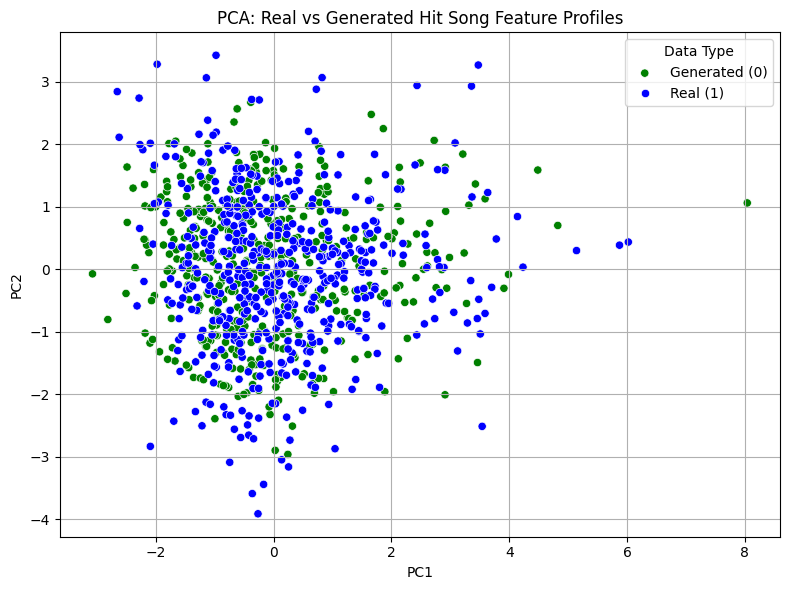

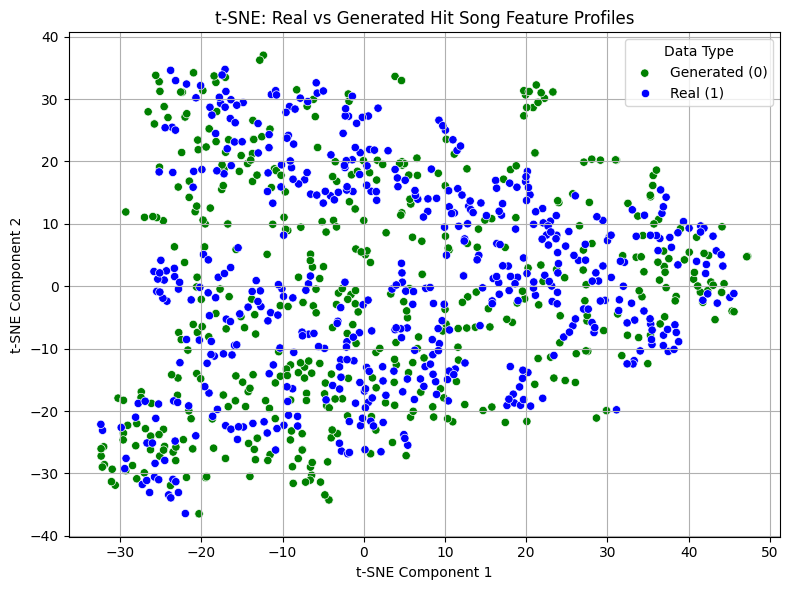

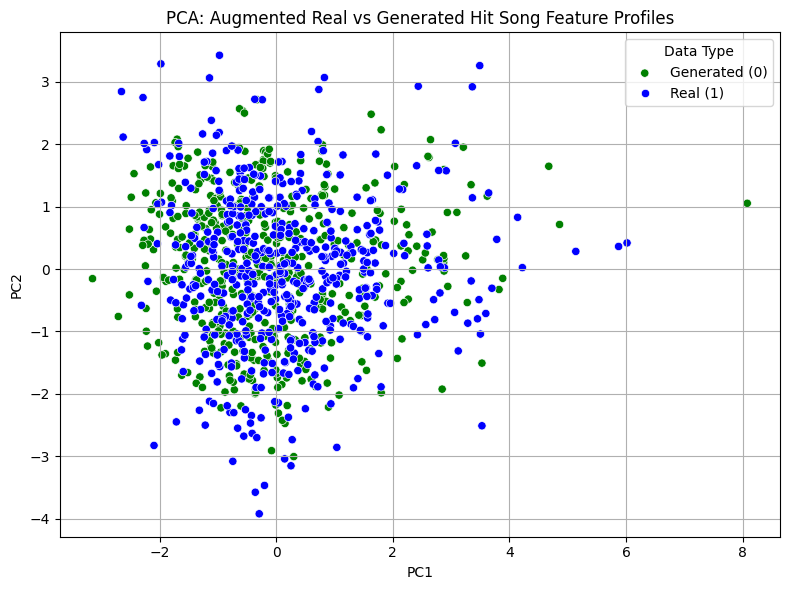

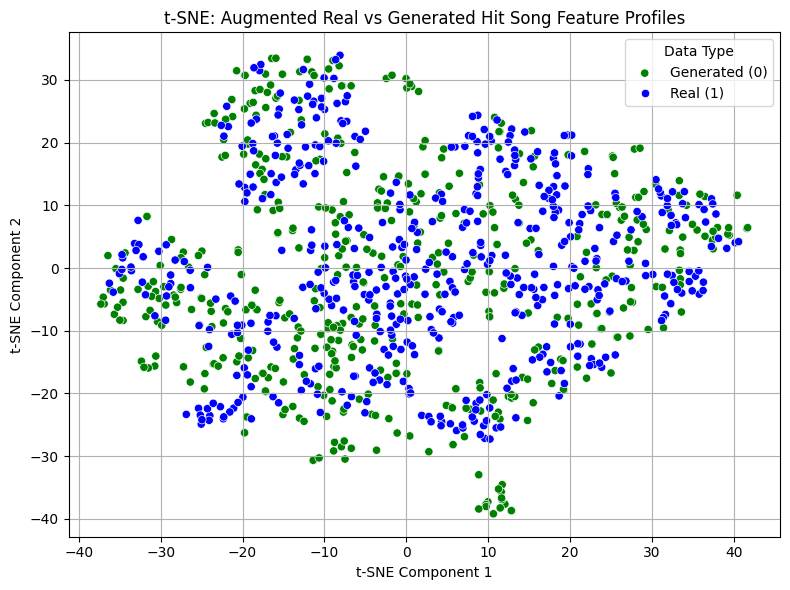

In [2]:
#try
# STEP 1: Imports
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# STEP 2: Load high popularity dataset
high_df = pd.read_csv("/content/high_popularity_spotify_data.csv")
high_df['track_album_release_date'] = pd.to_datetime(high_df['track_album_release_date'], errors='coerce')
high_df['release_year'] = high_df['track_album_release_date'].dt.year
recent_high = high_df[high_df['release_year'].between(2015, 2023)].copy()

# STEP 3: Define features and scale real data
features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms'
]

recent_high = recent_high.dropna(subset=features)
scaler = StandardScaler()
real_eval = scaler.fit_transform(recent_high[features])

# STEP 4: Define Generator architecture
latent_dim = 64
feature_dim = len(features)

class TunedGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, feature_dim)
        )

    def forward(self, z):
        return self.net(z)

# STEP 5: Mount and load Generator model from Drive
from google.colab import drive
drive.mount('/content/drive')
G = TunedGenerator()
G.load_state_dict(torch.load('/content/drive/MyDrive/gan_models/generator.pth'))
G.eval()

# STEP 6: Generate synthetic samples
z = torch.randn(500, latent_dim)
gen_eval = G(z).detach().numpy()

# STEP 7: REMOVED COSINE SIMILARITY COMPARISON

# STEP 8: Combine real and generated data
X_combined = np.vstack([real_eval[:500], gen_eval])
y_combined = np.array([1]*500 + [0]*500)  # 1 = real, 0 = generated

# STEP 9: PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_combined, palette={1: "green", 0: "blue"})
plt.title("PCA: Real vs Generated Hit Song Feature Profiles")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title='Data Type', labels=['Generated (0)', 'Real (1)'])
plt.tight_layout()
plt.show()

# STEP 10: t-SNE Visualization
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_combined)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_combined, palette={1: "green", 0: "blue"})
plt.title("t-SNE: Real vs Generated Hit Song Feature Profiles")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.legend(title='Data Type', labels=['Generated (0)', 'Real (1)'])
plt.tight_layout()
plt.show()

# STEP 11: REMOVED CLASSIFIER EVALUATION

# STEP 12: REMOVED FID CALCULATION

# STEP 13: Data Augmentation for Robustness (Minor Jitter)
noise = np.random.normal(0, 0.1, real_eval.shape)  # Minor noise to augment real data
augmented_real_eval = real_eval + noise
X_combined_augmented = np.vstack([augmented_real_eval[:500], gen_eval])
y_combined_augmented = np.array([1]*500 + [0]*500)

# Re-run PCA and t-SNE for augmented data
X_pca_aug = pca.fit_transform(X_combined_augmented)
X_tsne_aug = tsne.fit_transform(X_combined_augmented)

# Visualize PCA and t-SNE for augmented data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_aug[:, 0], y=X_pca_aug[:, 1], hue=y_combined_augmented, palette={1: "green", 0: "blue"})
plt.title("PCA: Augmented Real vs Generated Hit Song Feature Profiles")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title='Data Type', labels=['Generated (0)', 'Real (1)'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne_aug[:, 0], y=X_tsne_aug[:, 1], hue=y_combined_augmented, palette={1: "green", 0: "blue"})
plt.title("t-SNE: Augmented Real vs Generated Hit Song Feature Profiles")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.legend(title='Data Type', labels=['Generated (0)', 'Real (1)'])
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


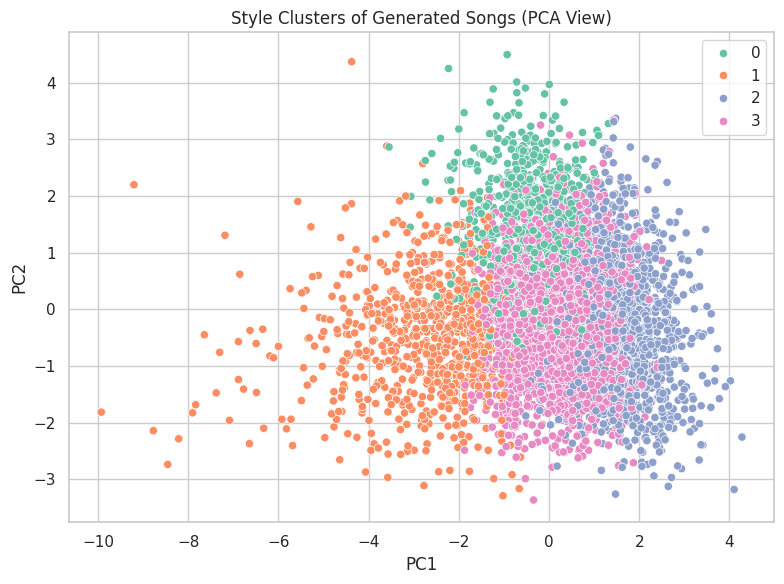

Style Predictor Accuracy: 0.9913

GAN-Augmented Hit Classifier Results:
Accuracy: 0.8947845804988662
Classification Report:
              precision    recall  f1-score   support

           0      0.724     0.890     0.798       516
           1      0.964     0.896     0.929      1689

    accuracy                          0.895      2205
   macro avg      0.844     0.893     0.864      2205
weighted avg      0.908     0.895     0.898      2205



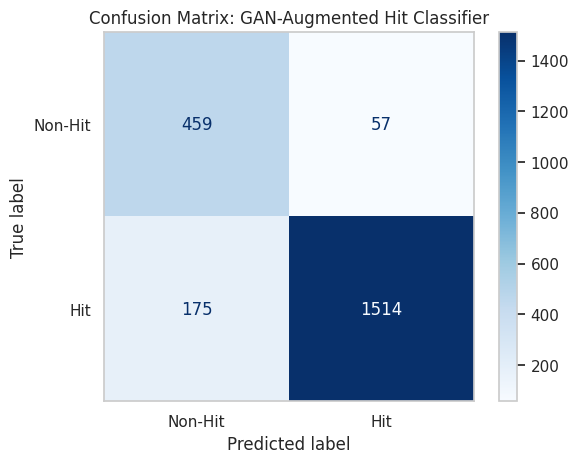

In [ ]:
# === STEP 1: Imports ===
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === STEP 2: Define features and Generator ===
features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms'
]
latent_dim = 64
feature_dim = len(features)

class TunedGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, feature_dim)
        )

    def forward(self, z):
        return self.net(z)

# === STEP 3: Load Generator from Drive and generate synthetic data ===
from google.colab import drive
drive.mount('/content/drive')
G = TunedGenerator()
G.load_state_dict(torch.load('/content/drive/MyDrive/gan_models/generator.pth'))
G.eval()

z = torch.randn(5000, latent_dim)
gen_data = G(z).detach().numpy()

# === STEP 4: Style Clustering (on synthetic songs) ===
scaler = StandardScaler()
gen_scaled = scaler.fit_transform(gen_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(gen_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(gen_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="Set2")
plt.title("Style Clusters of Generated Songs (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Train a style predictor
X_style = pd.DataFrame(gen_scaled, columns=features)
y_style = clusters
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_style, y_style, test_size=0.3, random_state=42)

style_clf = LogisticRegression(max_iter=500)
style_clf.fit(X_train_c, y_train_c)
y_pred_c = style_clf.predict(X_test_c)
acc_style = accuracy_score(y_test_c, y_pred_c)
print(f"Style Predictor Accuracy: {acc_style:.4f}")

# === STEP 5: GAN-Augmented Hit Classifier ===
# Load real datasets
high_df = pd.read_csv("/content/high_popularity_spotify_data.csv")
low_df = pd.read_csv("/content/low_popularity_spotify_data.csv")

high_df['track_album_release_date'] = pd.to_datetime(high_df['track_album_release_date'], errors='coerce')
low_df['track_album_release_date'] = pd.to_datetime(low_df['track_album_release_date'], errors='coerce')
high_df['release_year'] = high_df['track_album_release_date'].dt.year
low_df['release_year'] = low_df['track_album_release_date'].dt.year

high_df = high_df[high_df['release_year'].between(2015, 2023)].dropna(subset=features)
low_df = low_df[low_df['release_year'].between(2015, 2023)].dropna(subset=features)

high_df['label'] = 1
low_df['label'] = 0

gan_df = pd.DataFrame(gen_data, columns=features)
gan_df['label'] = 1

all_df = pd.concat([high_df[features + ['label']], low_df[features + ['label']], gan_df], ignore_index=True)
X = scaler.fit_transform(all_df[features])
y = all_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nGAN-Augmented Hit Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Hit", "Hit"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: GAN-Augmented Hit Classifier")
plt.grid(False)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Model: Logistic Regression
 Accuracy: 0.9020
 Classification Report:
              precision    recall  f1-score   support

           0      0.706     0.996     0.826       516
           1      0.999     0.873     0.932      1689

    accuracy                          0.902      2205
   macro avg      0.852     0.935     0.879      2205
weighted avg      0.930     0.902     0.907      2205



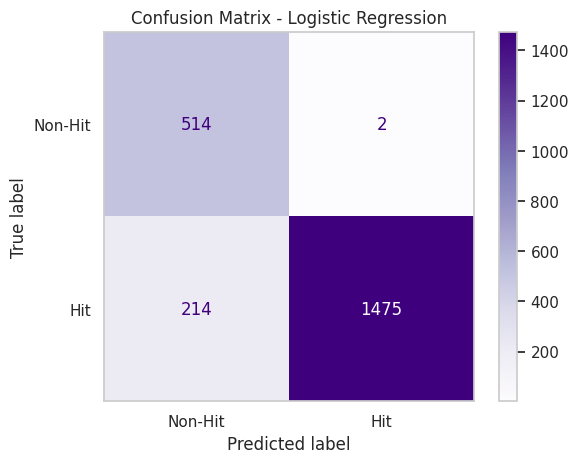


 Model: Random Forest
 Accuracy: 0.9211
 Classification Report:
              precision    recall  f1-score   support

           0      0.760     0.969     0.852       516
           1      0.990     0.906     0.946      1689

    accuracy                          0.921      2205
   macro avg      0.875     0.938     0.899      2205
weighted avg      0.936     0.921     0.924      2205



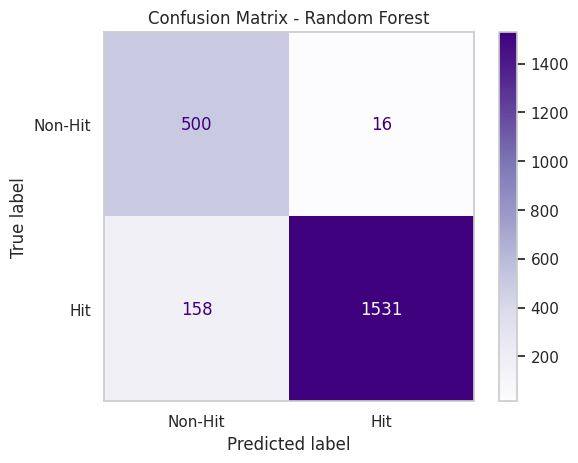


 Model: Gradient Boosting
 Accuracy: 0.9029
 Classification Report:
              precision    recall  f1-score   support

           0      0.707     0.998     0.828       516
           1      0.999     0.874     0.932      1689

    accuracy                          0.903      2205
   macro avg      0.853     0.936     0.880      2205
weighted avg      0.931     0.903     0.908      2205



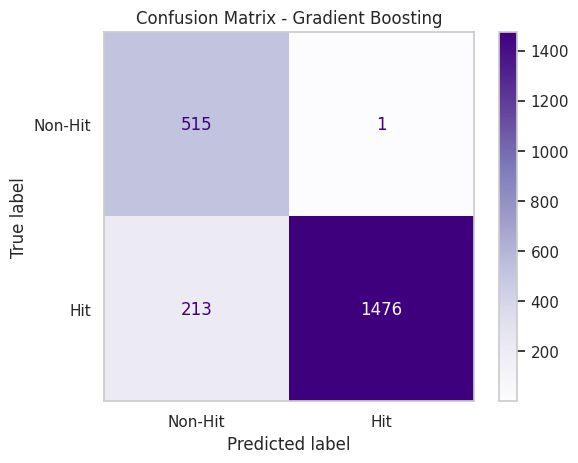


 Model: SVM (RBF Kernel)
 Accuracy: 0.9025
 Classification Report:
              precision    recall  f1-score   support

           0      0.706     1.000     0.828       516
           1      1.000     0.873     0.932      1689

    accuracy                          0.902      2205
   macro avg      0.853     0.936     0.880      2205
weighted avg      0.931     0.902     0.908      2205



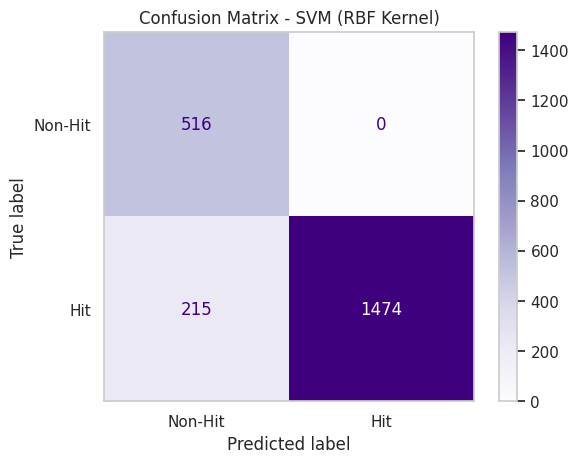

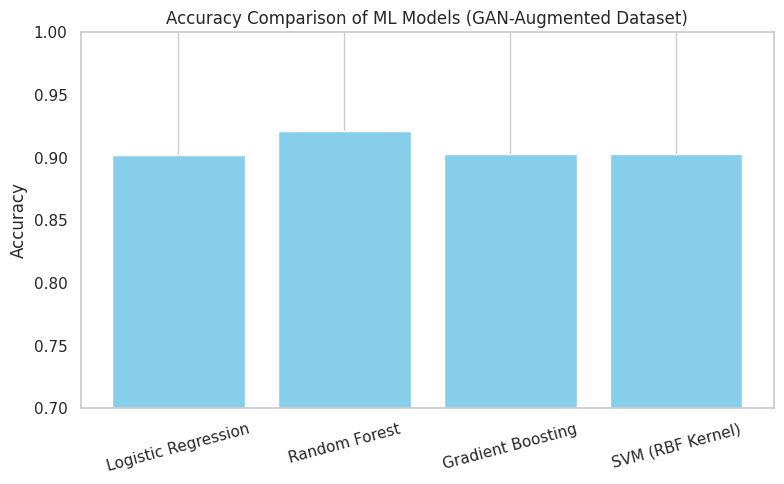

In [ ]:
# === STEP 1: Import Libraries ===
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# === STEP 2: Mount Google Drive & Load Generator (if needed) ===
from google.colab import drive
drive.mount('/content/drive')

features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms'
]

# === STEP 3: Load Synthetic and Real Data ===
high_df = pd.read_csv("/content/high_popularity_spotify_data.csv")
low_df = pd.read_csv("/content/low_popularity_spotify_data.csv")
gan_df = pd.read_csv("/content/gan_synthetic_data.csv") if 'gan_synthetic_data.csv' in locals() else None

# Use previously generated GAN data if needed
latent_dim = 64
feature_dim = len(features)

class TunedGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, feature_dim)
        )

    def forward(self, z):
        return self.net(z)

G = TunedGenerator()
G.load_state_dict(torch.load('/content/drive/MyDrive/gan_models/generator.pth'))
G.eval()

# Generate synthetic data again if needed
z = torch.randn(5000, latent_dim)
gen_data = G(z).detach().numpy()
gan_df = pd.DataFrame(gen_data, columns=features)
gan_df['label'] = 1

# Clean and prepare real data
high_df['track_album_release_date'] = pd.to_datetime(high_df['track_album_release_date'], errors='coerce')
low_df['track_album_release_date'] = pd.to_datetime(low_df['track_album_release_date'], errors='coerce')
high_df['release_year'] = high_df['track_album_release_date'].dt.year
low_df['release_year'] = low_df['track_album_release_date'].dt.year

high_df = high_df[high_df['release_year'].between(2015, 2023)].dropna(subset=features)
low_df = low_df[low_df['release_year'].between(2015, 2023)].dropna(subset=features)

high_df['label'] = 1
low_df['label'] = 0

# Combine all
df_all = pd.concat([high_df[features + ['label']], low_df[features + ['label']], gan_df], ignore_index=True)

# === STEP 4: Train/Test Split ===
scaler = StandardScaler()
X = scaler.fit_transform(df_all[features])
y = df_all['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === STEP 5: Apply SMOTE for Class Imbalance (optional) ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# === STEP 6: Define Models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, class_weight='balanced')
}

# === STEP 7: Hyperparameter Tuning (Optional) ===
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='accuracy')

# === STEP 8: Train, Evaluate, and Plot Confusion Matrices ===
results = {}

for name, model in models.items():
    print(f"\n Model: {name}")
    if name == "Random Forest":
        model = grid_search_rf.fit(X_train_res, y_train_res).best_estimator_
    elif name == "Gradient Boosting":
        model = grid_search_gb.fit(X_train_res, y_train_res).best_estimator_

    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f" Accuracy: {acc:.4f}")
    print(" Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Hit", "Hit"])
    disp.plot(cmap="Purples")
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

# === STEP 9: Accuracy Comparison Bar Plot ===
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models (GAN-Augmented Dataset)")
plt.xticks(rotation=15)
plt.ylim(0.7, 1.0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


 Top Features by Random Forest Importance:
            Feature  Importance
9       duration_ms      0.2673
3             tempo      0.2165
4          loudness      0.1887
6  instrumentalness      0.0823
5       speechiness      0.0600
7      acousticness      0.0390
1            energy      0.0388
2           valence      0.0383
8          liveness      0.0375
0      danceability      0.0316


<ipython-input-13-bd6c38691650>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='crest')


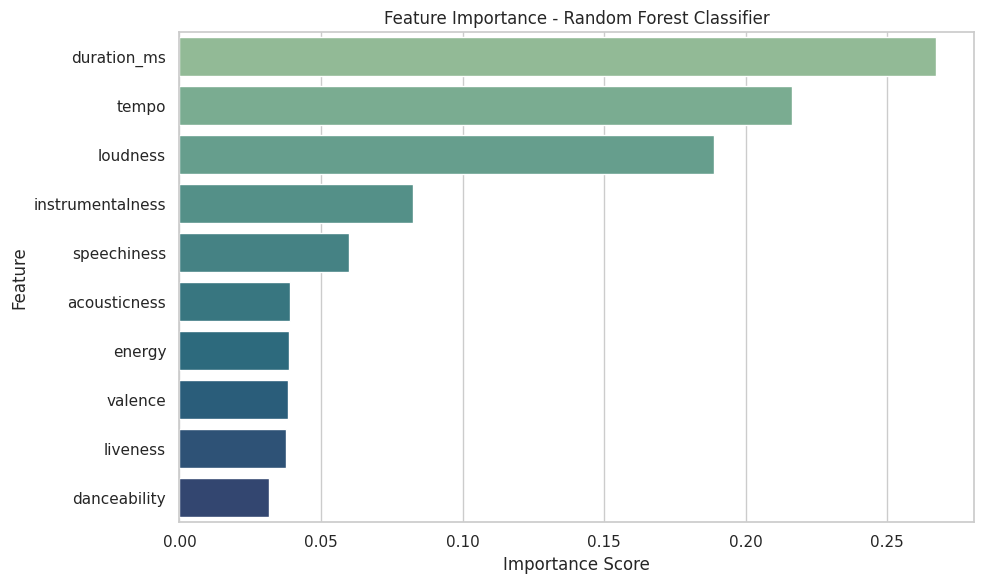

In [ ]:
# === STEP 1: Imports ===
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# === STEP 2: Fit Random Forest (assuming X_train, y_train already exist) ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# === STEP 3: Extract Feature Importances ===
importances = rf_model.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# === STEP 4: Display Top Features ===
print(" Top Features by Random Forest Importance:")
print(rf_importance_df.round(4))

# === STEP 5: Plot Feature Importance ===
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='crest')
plt.title("Feature Importance - Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Saving high_popularity_spotify_data.csv to high_popularity_spotify_data (2).csv
Saving low_popularity_spotify_data.csv to low_popularity_spotify_data (2).csv
Saved 2023 trend profile to trend_profile_2023.csv
Epoch 0: D_loss = 9036.7705, G_loss = 9035.6182
Epoch 25: D_loss = 9036.5742, G_loss = 9035.8145
Epoch 50: D_loss = 9036.5723, G_loss = 9035.8643
Epoch 75: D_loss = 9036.5381, G_loss = 9035.8975
Epoch 100: D_loss = 9036.5781, G_loss = 9035.8652
Epoch 125: D_loss = 9036.5107, G_loss = 9035.8496
Epoch 150: D_loss = 9036.5146, G_loss = 9035.8945
Epoch 175: D_loss = 9036.5078, G_loss = 9035.8955
Epoch 200: D_loss = 9036.5020, G_loss = 9035.9023
Epoch 225: D_loss = 9036.5391, G_loss = 9035.8936
Epoch 250: D_loss = 9036.5498, G_loss = 9035.8857
Epoch 275: D_loss = 9036.4365, G_loss = 9035.8828
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Generator model saved to Drive.


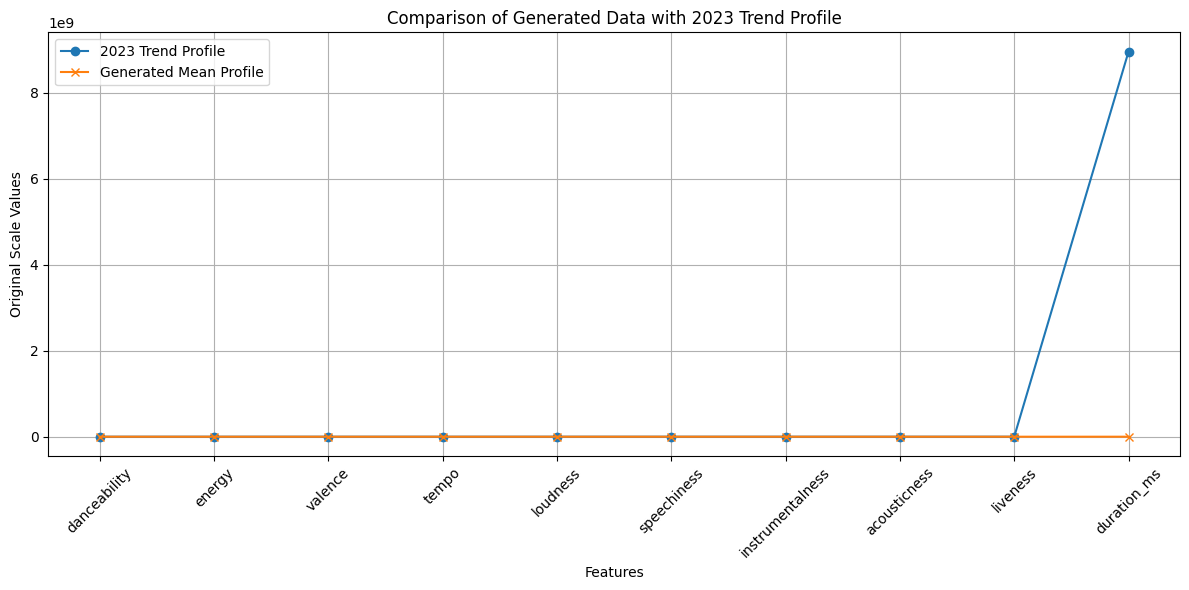

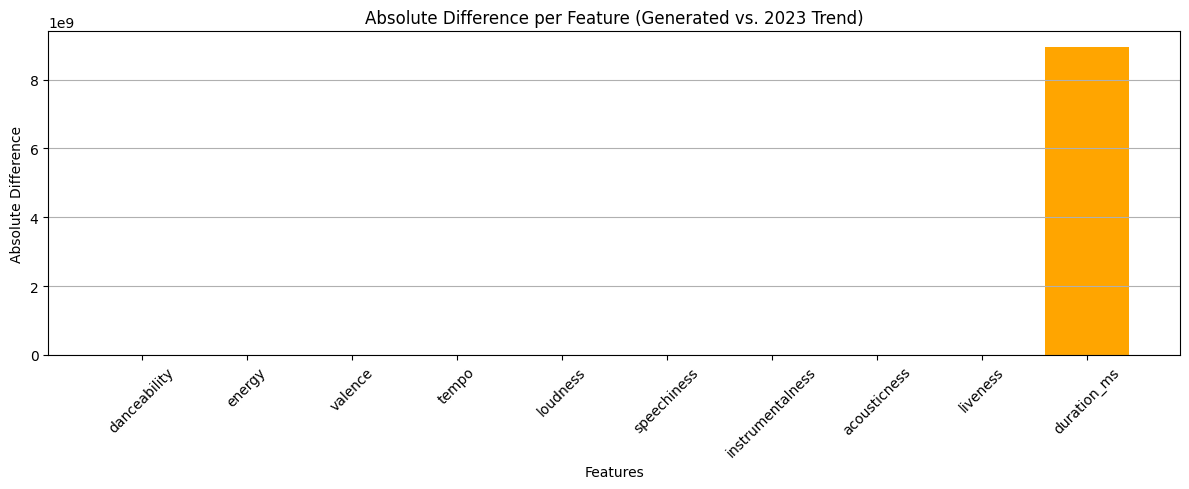


🧮 Mean Absolute Difference (MAD): 895161344.0000
📐 Cosine Similarity: 1.0000


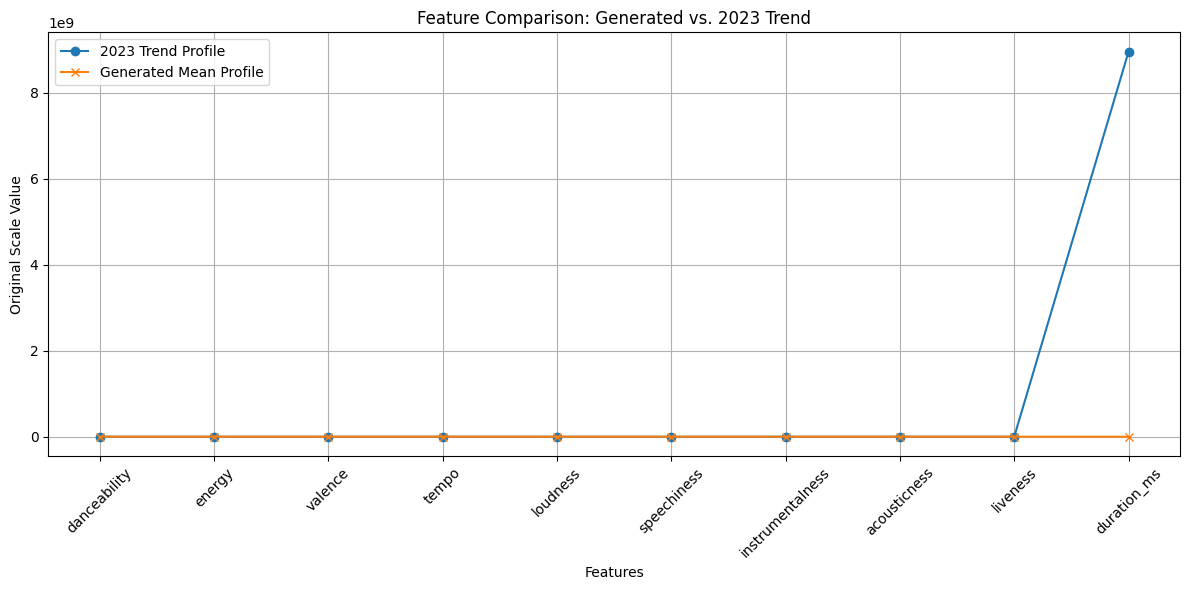

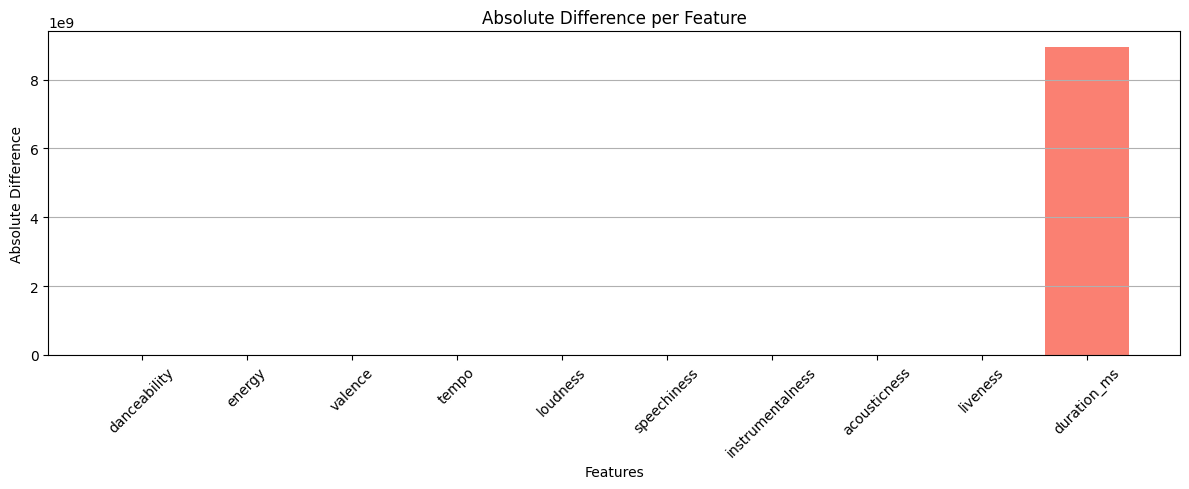

In [3]:
# STEP 1: Upload and import
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import os

# STEP 2: Load and clean datasets
high_df = pd.read_csv("high_popularity_spotify_data.csv")
low_df = pd.read_csv("low_popularity_spotify_data.csv")

high_df['track_album_release_date'] = pd.to_datetime(high_df['track_album_release_date'], errors='coerce')
low_df['track_album_release_date'] = pd.to_datetime(low_df['track_album_release_date'], errors='coerce')

high_df['release_year'] = high_df['track_album_release_date'].dt.year
low_df['release_year'] = low_df['track_album_release_date'].dt.year

recent_high = high_df[high_df['release_year'].between(2015, 2023)].copy()
recent_low = low_df[low_df['release_year'].between(2015, 2023)].copy()

features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness',
    'instrumentalness', 'acousticness', 'liveness', 'duration_ms'
]

recent_high = recent_high.dropna(subset=features)
recent_low = recent_low.dropna(subset=features)

#  SAVE 2023 TEMPORAL TREND PROFILE
profile_2023 = high_df[high_df['release_year'] == 2023][features].mean()
profile_2023.to_csv('/content/trend_profile_2023.csv')
print("Saved 2023 trend profile to trend_profile_2023.csv")

# Prepare data
scaler = StandardScaler()
X_real = scaler.fit_transform(recent_high[features])
X_fake_neg = scaler.transform(recent_low[features])

real_data = torch.tensor(X_real, dtype=torch.float32)
fake_neg_data = torch.tensor(X_fake_neg, dtype=torch.float32)

# STEP 3: GAN Setup
latent_dim = 64
feature_dim = real_data.shape[1]
epochs = 300
batch_size = 64

class TunedGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, feature_dim)
        )

    def forward(self, z):
        return self.net(z)

class TunedDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

G = TunedGenerator()
D = TunedDiscriminator()
loss_fn = nn.BCELoss()
G_opt = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_opt = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
real_loader = DataLoader(TensorDataset(real_data), batch_size=batch_size, shuffle=True)

# Load the trend profile for 2023
trend_profile_2023 = pd.read_csv('/content/trend_profile_2023.csv', index_col=0)
trend_tensor_2023 = torch.tensor(profile_2023.values, dtype=torch.float32).unsqueeze(0)

# Cosine similarity module
cos = nn.CosineSimilarity(dim=1)

# Alpha controls weight between MAD and Cosine
alpha = 0.5  # You can tune this (e.g., 0.7 means more weight to MAD)

# STEP 4: Training loop
for epoch in range(epochs):
    for real_batch, in real_loader:
        batch_size = real_batch.size(0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        z = torch.randn(batch_size, latent_dim)
        fake_batch = G(z)

        trend_tensor_2023_expanded = trend_tensor_2023.repeat(batch_size, 1)

        # Compute MAD (L1) loss
        l1_penalty = torch.mean(torch.abs(fake_batch - trend_tensor_2023_expanded))

        # Compute cosine similarity penalty
        cos_sim = cos(fake_batch, trend_tensor_2023_expanded)
        cos_penalty = 1 - cos_sim.mean()  # higher means more dissimilar

        # Combine both
        temporal_drift_penalty = alpha * l1_penalty + (1 - alpha) * cos_penalty

        # Discriminator loss
        D_real = D(real_batch)
        D_fake = D(fake_batch.detach())
        D_loss = loss_fn(D_real, real_labels) + loss_fn(D_fake, fake_labels) + temporal_drift_penalty

        if len(fake_neg_data) >= batch_size:
            neg_samples = fake_neg_data[np.random.choice(len(fake_neg_data), batch_size)]
            D_neg = D(neg_samples)
            D_loss += loss_fn(D_neg, fake_labels)

        D_opt.zero_grad()
        D_loss.backward(retain_graph=True)
        D_opt.step()

        # Generator update
        z = torch.randn(batch_size, latent_dim)
        fake_batch = G(z)
        D_fake = D(fake_batch)

        # Recompute penalty for this fake_batch
        l1_penalty = torch.mean(torch.abs(fake_batch - trend_tensor_2023_expanded))
        cos_sim = cos(fake_batch, trend_tensor_2023_expanded)
        cos_penalty = 1 - cos_sim.mean()
        temporal_drift_penalty = alpha * l1_penalty + (1 - alpha) * cos_penalty

        G_loss = loss_fn(D_fake, real_labels) + temporal_drift_penalty

        G_opt.zero_grad()
        G_loss.backward()
        G_opt.step()

    if epoch % 25 == 0:
        print(f"Epoch {epoch}: D_loss = {D_loss.item():.4f}, G_loss = {G_loss.item():.4f}")

# Save model to Google Drive
from google.colab import drive
drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/gan_models"
os.makedirs(save_path, exist_ok=True)
torch.save(G.state_dict(), os.path.join(save_path, "generator.pth"))
print("Generator model saved to Drive.")

import matplotlib.pyplot as plt

# STEP 5: Visualization of Generated vs 2023 Trend

# Generate synthetic samples
G.eval()
with torch.no_grad():
    z = torch.randn(1000, latent_dim)
    generated_samples = G(z).cpu().numpy()

# Inverse transform to get real-scale values (optional, but clearer)
generated_original_scale = scaler.inverse_transform(generated_samples)
trend_profile_2023_original = scaler.inverse_transform(trend_tensor_2023.numpy())[0]

# Compute mean of generated data
generated_mean = generated_original_scale.mean(axis=0)

# Plot feature comparison (line plot)
plt.figure(figsize=(12, 6))
plt.plot(features, trend_profile_2023_original, label='2023 Trend Profile', marker='o')
plt.plot(features, generated_mean, label='Generated Mean Profile', marker='x')
plt.title("Comparison of Generated Data with 2023 Trend Profile")
plt.xlabel("Features")
plt.ylabel("Original Scale Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot absolute difference (bar chart)
difference = np.abs(generated_mean - trend_profile_2023_original)

plt.figure(figsize=(12, 5))
plt.bar(features, difference, color='orange')
plt.title("Absolute Difference per Feature (Generated vs. 2023 Trend)")
plt.xlabel("Features")
plt.ylabel("Absolute Difference")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity

# STEP 5: Visualization + Metrics for Generated vs. 2023 Trend

# Set model to eval mode and generate synthetic samples
G.eval()
with torch.no_grad():
    z = torch.randn(1000, latent_dim)
    generated_samples = G(z).cpu().numpy()

# Inverse transform to original scale
generated_original = scaler.inverse_transform(generated_samples)
trend_original = scaler.inverse_transform(trend_tensor_2023.numpy())[0]

# Calculate mean vector of generated data
generated_mean = generated_original.mean(axis=0)

# ---- 1. Mean Absolute Difference (MAD) ----
mad_value = np.mean(np.abs(generated_mean - trend_original))
print(f"\n🧮 Mean Absolute Difference (MAD): {mad_value:.4f}")

# ---- 2. Cosine Similarity ----
cos_sim = cosine_similarity(generated_mean.reshape(1, -1), trend_original.reshape(1, -1))[0][0]
print(f"📐 Cosine Similarity: {cos_sim:.4f}")

# ---- 3. Line Plot: Feature Trends ----
plt.figure(figsize=(12, 6))
plt.plot(features, trend_original, label='2023 Trend Profile', marker='o')
plt.plot(features, generated_mean, label='Generated Mean Profile', marker='x')
plt.title("Feature Comparison: Generated vs. 2023 Trend")
plt.xlabel("Features")
plt.ylabel("Original Scale Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ---- 4. Bar Plot: Absolute Differences ----
abs_diff = np.abs(generated_mean - trend_original)
plt.figure(figsize=(12, 5))
plt.bar(features, abs_diff, color='salmon')
plt.title("Absolute Difference per Feature")
plt.xlabel("Features")
plt.ylabel("Absolute Difference")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

